In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#plots will display in the output cell
%matplotlib inline

In [2]:
'''
obtaining all the text from the ESPN page I'm looking to analyze
'''
response = requests.get('https://www.espn.com/soccer/soccer-transfers/story/4087601/ranking-the-50-worst-premier-league-transfers-of-all-time')
response.status_code

200

In [3]:
'''
Parsing out the HTML text to work with it in a more manageable format

https://stackoverflow.com/questions/17011357/what-is-the-difference-between-content-and-text
r.text is the content of the response in Unicode, and r.content is the content of the response in bytes.
'''
content = response.content
parser = BeautifulSoup(content,'html.parser')

In [4]:
'''
select all the elements that are part of the 'article-body' class
'''
article_body = parser.select(".article-body")
len(article_body)

1

In [5]:
'''
find all the header tags where the names of the players and the teams they transferred to are located
'''
headers = article_body[0].find_all("h2")
headers

[<h2><a class="" href="/soccer/soccer-transfers/story/4081352/ranking-the-best-premier-league-transfers-of-all-time-50-1" name="&amp;lpos=story:editorspicks:inline:1">Ranking the best Premier League transfers of all time: 50-1</a></h2>,
 <h2><a class="" href="/soccer/soccer-transfers/story/4079368/ranking-the-best-premier-league-transfers-of-all-time-100-51" name="&amp;lpos=story:editorspicks:inline:2">Ranking the best Premier League transfers of all time: 100-51</a></h2>,
 <h2><a class="" href="/soccer/blog/soccer-transfers/3/post/3841797/top-free-agents-in-2020-cavaniwilliangiroudsilva-lead-the-way" name="&amp;lpos=story:editorspicks:inline:3">Top free agents in 2020: Cavani, Willian, Giroud, Silva lead the way</a></h2>,
 <h2>Honorable mentions</h2>,
 <h2>50. Marcelino, DF, Newcastle</h2>,
 <h2>49. Dennis Wise, MF, Leicester City</h2>,
 <h2>48. Park Chu-Young, FW, Arsenal</h2>,
 <h2>47. Milton Nunez, FW, Sunderland</h2>,
 <h2>46. Yannick Bolasie, FW, Everton</h2>,
 <h2>45. Angel Di M

In [6]:
'''
want only the last 50 elements from the list because that's where the player names are
'''
players_headers = headers[-50:]
players_headers

[<h2>50. Marcelino, DF, Newcastle</h2>,
 <h2>49. Dennis Wise, MF, Leicester City</h2>,
 <h2>48. Park Chu-Young, FW, Arsenal</h2>,
 <h2>47. Milton Nunez, FW, Sunderland</h2>,
 <h2>46. Yannick Bolasie, FW, Everton</h2>,
 <h2>45. Angel Di Maria, FW, Manchester United</h2>,
 <h2>44. Afonso Alves, FW, Middlesbrough</h2>,
 <h2>43. Per Kroldrup, DF, Everton</h2>,
 <h2>42. Ben Gibson, CB, Burnley</h2>,
 <h2>41. Oumar Niasse, FW, Everton</h2>,
 <h2>40. Corrado Grabbi, FW, Blackburn</h2>,
 <h2>39. Fernando Torres, FW, Chelsea</h2>,
 <h2>38. Andy Carroll, FW, Liverpool</h2>,
 <h2>37. Juan Sebastian Veron, MF, Manchester United</h2>,
 <h2>36. Andrea Silenzi, FW, Nottingham Forest</h2>,
 <h2>35. Didier Ndong, MF, Sunderland</h2>,
 <h2>34. Papy Djilobodji, DF, Sunderland</h2>,
 <h2>33. Massimo Taibi, GK, Manchester United</h2>,
 <h2>32. Francis Jeffers, FW, Arsenal</h2>,
 <h2>31. Kostas Mitroglou, FW, Fulham</h2>,
 <h2>30. Marco Boogers, FW, West Ham</h2>,
 <h2>29. Nikola Zigic, FW, Birmingham City<

In [7]:
'''
removing all the data within <h2> and </h2>, as well as any numbers present
'''
for i, player in enumerate(players_headers):
    remove_headers = re.sub('<.*?>','',str(player))
    remove_digits_whitespace = re.sub(r'[0-9][0-9]?. ','',remove_headers)
    players_headers[i] = remove_digits_whitespace

In [8]:
players_headers

['Marcelino, DF, Newcastle',
 'Dennis Wise, MF, Leicester City',
 'Park Chu-Young, FW, Arsenal',
 'Milton Nunez, FW, Sunderland',
 'Yannick Bolasie, FW, Everton',
 'Angel Di Maria, FW, Manchester United',
 'Afonso Alves, FW, Middlesbrough',
 'Per Kroldrup, DF, Everton',
 'Ben Gibson, CB, Burnley',
 'Oumar Niasse, FW, Everton',
 'Corrado Grabbi, FW, Blackburn',
 'Fernando Torres, FW, Chelsea',
 'Andy Carroll, FW, Liverpool',
 'Juan Sebastian Veron, MF, Manchester United',
 'Andrea Silenzi, FW, Nottingham Forest',
 'Didier Ndong, MF, Sunderland',
 'Papy Djilobodji, DF, Sunderland',
 'Massimo Taibi, GK, Manchester United',
 'Francis Jeffers, FW, Arsenal',
 'Kostas Mitroglou, FW, Fulham',
 'Marco Boogers, FW, West Ham',
 'Nikola Zigic, FW, Birmingham City',
 'Michael Owen, FW, Newcastle United',
 'Owen Hargreaves, MF, Manchester United',
 'Seth Johnson, MF, Leeds United',
 'Sergey Rebrov, FW, Tottenham',
 'Roberto, GK, West Ham',
 'Giannelli Imbula, MF, Stoke City',
 'Saido Berahino, FW, S

In [9]:
'''
creating a pandas DataFrame
'''
worst_transfers = pd.DataFrame(players_headers,columns = ['Players'])
worst_transfers

,Players
0,"Marcelino, DF, Newcastle"
1,"Dennis Wise, MF, Leicester City"
2,"Park Chu-Young, FW, Arsenal"
3,"Milton Nunez, FW, Sunderland"
4,"Yannick Bolasie, FW, Everton"
5,"Angel Di Maria, FW, Manchester United"
6,"Afonso Alves, FW, Middlesbrough"
7,"Per Kroldrup, DF, Everton"
8,"Ben Gibson, CB, Burnley"
9,"Oumar Niasse, FW, Everton"


In [10]:
'''
creating a Series object where the data is split so that each row is composed of a list that contains three elements
(player name, player position, team the player transferred to)
'''

splitting = worst_transfers['Players'].str.split(',')
splitting

0                        [Marcelino,  DF,  Newcastle]
1                 [Dennis Wise,  MF,  Leicester City]
2                     [Park Chu-Young,  FW,  Arsenal]
3                    [Milton Nunez,  FW,  Sunderland]
4                    [Yannick Bolasie,  FW,  Everton]
5           [Angel Di Maria,  FW,  Manchester United]
6                 [Afonso Alves,  FW,  Middlesbrough]
7                       [Per Kroldrup,  DF,  Everton]
8                         [Ben Gibson,  CB,  Burnley]
9                       [Oumar Niasse,  FW,  Everton]
10                  [Corrado Grabbi,  FW,  Blackburn]
11                   [Fernando Torres,  FW,  Chelsea]
12                    [Andy Carroll,  FW,  Liverpool]
13    [Juan Sebastian Veron,  MF,  Manchester United]
14          [Andrea Silenzi,  FW,  Nottingham Forest]
15                   [Didier Ndong,  MF,  Sunderland]
16                [Papy Djilobodji,  DF,  Sunderland]
17           [Massimo Taibi,  GK,  Manchester United]
18                   [Franci

In [11]:
'''
Splitting the data in a vectorized manner so that is composed of the three columns I'm wanting to examine
'''
worst_transfers['Position'] = splitting.str[1].str.strip()
worst_transfers['Club'] = splitting.str[2].str.strip()
worst_transfers['Players'] = splitting.str[0]
worst_transfers

,Players,Position,Club
0,Marcelino,DF,Newcastle
1,Dennis Wise,MF,Leicester City
2,Park Chu-Young,FW,Arsenal
3,Milton Nunez,FW,Sunderland
4,Yannick Bolasie,FW,Everton
5,Angel Di Maria,FW,Manchester United
6,Afonso Alves,FW,Middlesbrough
7,Per Kroldrup,DF,Everton
8,Ben Gibson,CB,Burnley
9,Oumar Niasse,FW,Everton


In [12]:
'''
looking at different postions; want to sort them into GK (goalkeeper), DF (defense), MF (midfield), and FW (forward)
'''
worst_transfers['Position'].unique()

array(['DF', 'MF', 'FW', 'CB', 'GK', 'AM'], dtype=object)

In [13]:
'''
examining the rows of data that don't fall into the GK, DF, MF, and FW positions
'''
center_back = worst_transfers.loc[worst_transfers['Position'] == 'CB']
attacking_mid = worst_transfers.loc[worst_transfers['Position'] == 'AM']
print(center_back)
print(attacking_mid)

          Players Position     Club
8      Ben Gibson       CB  Burnley
36  Roger Johnson       CB   Wolves
           Players Position         Club
33  Gaston Ramirez       AM  Southampton


In [14]:
'''
replacing AM (Attacking Midfielder) with MF (Midfielder) and CB (Center Back) with DF (Defender)
'''
worst_transfers['Position'] = worst_transfers['Position'].str.replace('CB','DF')
worst_transfers['Position'] = worst_transfers['Position'].str.replace('AM','MF')
worst_transfers['Position'].unique()

array(['DF', 'MF', 'FW', 'GK'], dtype=object)

## Analysis

In [15]:
'''
examining how many players each club had that were categorized as the top 50 worst transfers
'''
club_groupby = worst_transfers.groupby('Club').size()
sort_club_groupby = club_groupby.sort_values(ascending = False)
sort_club_groupby

Club
Manchester United    6
Sunderland           5
Chelsea              5
Southampton          4
Liverpool            3
Everton              3
Arsenal              2
Fulham               2
Stoke City           2
West Ham             2
Leeds United         2
Aston Villa          1
Birmingham City      1
Blackburn            1
Blackburn Rovers     1
Burnley              1
Wolves               1
Leicester City       1
Middlesbrough        1
Newcastle            1
Newcastle United     1
Nottingham Forest    1
Tottenham            1
Tottenham Hotspur    1
Manchester City      1
dtype: int64

In [16]:
'''
extracting just the clubs that have greater than 2 players that are considered top 50 worst Premier League transfers
'''
top_6_clubs = sort_club_groupby.loc[sort_club_groupby >= 3]
top_6_clubs

Club
Manchester United    6
Sunderland           5
Chelsea              5
Southampton          4
Liverpool            3
Everton              3
dtype: int64

In [17]:
'''
extracting the columns from the DataFrame that have greater than 2 players that are considered top 50 worst 
Premier League transfers
'''
top_6_df = worst_transfers[worst_transfers['Club'].isin(top_6_clubs.index.tolist())]
top_6_df

,Players,Position,Club
3,Milton Nunez,FW,Sunderland
4,Yannick Bolasie,FW,Everton
5,Angel Di Maria,FW,Manchester United
7,Per Kroldrup,DF,Everton
9,Oumar Niasse,FW,Everton
11,Fernando Torres,FW,Chelsea
12,Andy Carroll,FW,Liverpool
13,Juan Sebastian Veron,MF,Manchester United
15,Didier Ndong,MF,Sunderland
16,Papy Djilobodji,DF,Sunderland


In [18]:
'''
extracting a pivot table to be used for visualization
'''
top_6_pivot = top_6_df.pivot_table(index = 'Club',columns = ['Position'],aggfunc = np.size, fill_value = 0)
top_6_pivot

Players         
Position               DF FW GK MF
Club                              
Chelsea                 1  3  0  1
Everton                 1  2  0  0
Liverpool               0  2  0  1
Manchester United       0  2  1  3
Southampton             0  3  0  1
Sunderland              1  1  0  3

In [19]:
'''
examining the column names
'''
top_6_pivot.columns

MultiIndex([('Players', 'DF'),
            ('Players', 'FW'),
            ('Players', 'GK'),
            ('Players', 'MF')],
           names=[None, 'Position'])

In [20]:
'''
dropping the None column name as it doesn't provide any additional info
'''
top_6_pivot = top_6_pivot.droplevel(None,axis = 1)
top_6_pivot

Position,DF,FW,GK,MF
Club,,,,
Chelsea,1,3,0,1
Everton,1,2,0,0
Liverpool,0,2,0,1
Manchester United,0,2,1,3
Southampton,0,3,0,1
Sunderland,1,1,0,3


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

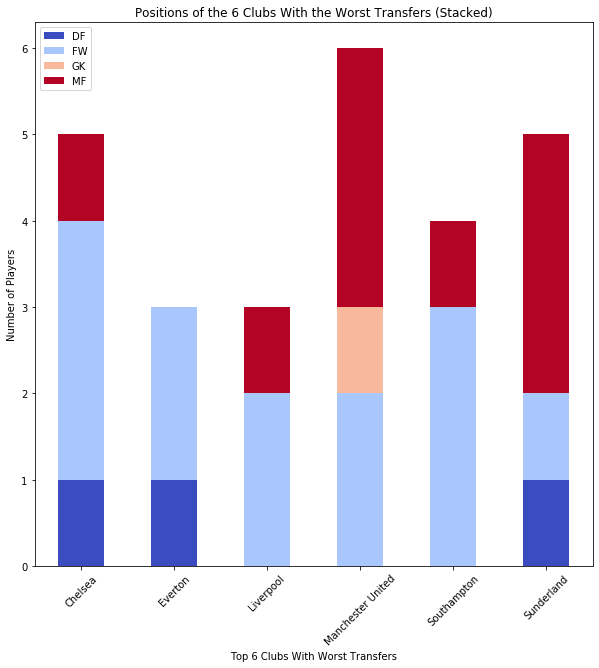

In [21]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot
top_6_pivot.plot.bar(stacked=True, title = 'Positions of the 6 Clubs With the Worst Transfers (Stacked)',
                     colormap = 'coolwarm',figsize=(10,10))
plt.legend(loc='upper left')
plt.ylabel('Number of Players')
plt.xlabel('Top 6 Clubs With Worst Transfers')
plt.xticks(rotation = 45)

Text(0, 0.5, 'Top 6 Clubs With Worst Transfers')

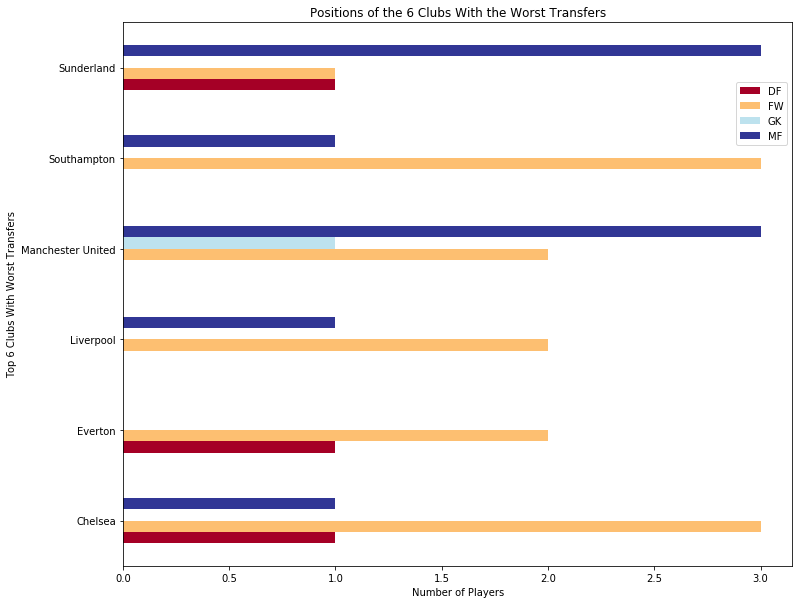

In [22]:
'''
examining a horizontal bar chart showing the same data as above
'''
top_6_pivot.plot.barh(title = 'Positions of the 6 Clubs With the Worst Transfers',
                     colormap = 'RdYlBu',figsize=(12,10))
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
plt.xlabel('Number of Players')
plt.ylabel('Top 6 Clubs With Worst Transfers')

In [23]:
'''
Grouping by club and position, just to reiterate the graphs above
'''
top_6_groupby = top_6_df.groupby(['Club','Position']).size()
print(top_6_groupby)
print(type(top_6_groupby))

Club               Position
Chelsea            DF          1
                   FW          3
                   MF          1
Everton            DF          1
                   FW          2
Liverpool          FW          2
                   MF          1
Manchester United  FW          2
                   GK          1
                   MF          3
Southampton        FW          3
                   MF          1
Sunderland         DF          1
                   FW          1
                   MF          3
dtype: int64
<class 'pandas.core.series.Series'>


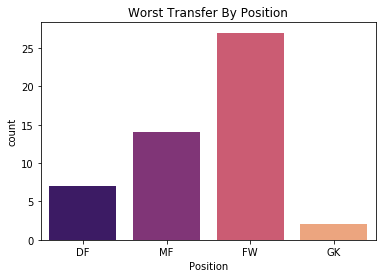

In [24]:
'''
seeing the count for worst transfers from each position
'''
sns.countplot(x = 'Position', data = worst_transfers, palette = 'magma')
plt.title('Worst Transfer By Position')
plt.show()

### Analysis on Where the Players Came From, and the Transfer Cost...

In [25]:
'''
find all the body tags where the player transferred from, the transfer price, and the year of the transfer
find_all method: will find all occurrences of a tag in the current element, and return a list.
'''
body = article_body[0].find_all("b")
body

[<b>Eric Djemba-Djemba</b>,
 <b>Ricky van Wolfswinkel</b>,
 <b>Jozy Altidore</b>,
 <b>Andreas Cornelius</b>,
 <b>Tanguy Ndombele</b>,
 <b>Joelinton</b>,
 <b>Moise Kean</b>,
 <b>Signed from Real Mallorca (Spain) for £6 million, 1999</b>,
 <b>Signed from Chelsea for £3.2 million, 2001</b>,
 <b>Signed from Monaco (France) for £5.9 million, 2011</b>,
 <b>Kuper:</b>,
 <b>Barnwell's best moves:</b>,
 <b>Signed from PAOK Salonika (Greece) for £2.4 million, 2000</b>,
 <b>Signed from Crystal Palace for £26 million, 2016</b>,
 <b>Signed from Real Madrid (Spain) for £67.5 million, 2014</b>,
 <b>Signed from Heerenveen (Netherlands) for £15.3 million, 2008</b>,
 <b>Signed from Udinese for £6.1 million, 2005</b>,
 <b>Signed from Middlesbrough for £15.2 million, 2018</b>,
 <b>Signed from Lokomotiv Moscow (Russia) for £16.1 million, 2016</b>,
 <b>Signed from Ternana (Italy) for £10.2 million, 2001</b>,
 <b>Signed from Liverpool for £52.7 million, 2011</b>,
 <b>Signed from Newcastle United for £36.9 mi

In [26]:
'''
Extracting the 50 body tags that are relevant to the players
'''
phrase = "Signed "
transfers = [str(transfer) for transfer in body if phrase in str(transfer)]
len(transfers)

50

### Want to extract the name of the team, the league the player came from (if applicable), the transfer amount (if applicable), and the year of the transfer

In [27]:
'''
Creating a dataframe with the necessary information
'''
pd.set_option('display.max_colwidth', 1000)
info_transfers = pd.DataFrame(transfers,columns = ['Full Body Tag'])
info_transfers

,Full Body Tag
0,"<b>Signed from Real Mallorca (Spain) for £6 million, 1999</b>"
1,"<b>Signed from Chelsea for £3.2 million, 2001</b>"
2,"<b>Signed from Monaco (France) for £5.9 million, 2011</b>"
3,"<b>Signed from PAOK Salonika (Greece) for £2.4 million, 2000</b>"
4,"<b>Signed from Crystal Palace for £26 million, 2016</b>"
5,"<b>Signed from Real Madrid (Spain) for £67.5 million, 2014</b>"
6,"<b>Signed from Heerenveen (Netherlands) for £15.3 million, 2008</b>"
7,"<b>Signed from Udinese for £6.1 million, 2005</b>"
8,"<b>Signed from Middlesbrough for £15.2 million, 2018</b>"
9,"<b>Signed from Lokomotiv Moscow (Russia) for £16.1 million, 2016</b>"


In [28]:
'''
Using regular expressions to extract transfer year, amount, club where the player transferred from, and name of the 
club where the player transferred from, 
'''

info_transfers['Transfer Year'] = info_transfers['Full Body Tag'].str.extract("(\d{4})")

info_transfers['Transfer Amount'] = info_transfers['Full Body Tag'].str.extract("£(\d[\d\.]{,2}\d?)")

info_transfers['Country of Previous Club'] = info_transfers['Full Body Tag'].str.extract("\((\w+)\)")

#extracts the first word of the team name and possibly the next word if it begins with a letter
info_transfers['Name of Previous Club'] = info_transfers['Full Body Tag'].str.extract("to|from\s(\w+\s[A-Za-z]*)")
#since the second word can also be 'for' or 'in', we want to remove that
info_transfers['Name of Previous Club'] = info_transfers['Name of Previous Club'].str.replace('for|in$','')

info_transfers

,Full Body Tag,Transfer Year,Transfer Amount,Country of Previous Club,Name of Previous Club
0,"<b>Signed from Real Mallorca (Spain) for £6 million, 1999</b>",1999,6,Spain,Real Mallorca
1,"<b>Signed from Chelsea for £3.2 million, 2001</b>",2001,3.2,NaN,Chelsea
2,"<b>Signed from Monaco (France) for £5.9 million, 2011</b>",2011,5.9,France,Monaco
3,"<b>Signed from PAOK Salonika (Greece) for £2.4 million, 2000</b>",2000,2.4,Greece,PAOK Salonika
4,"<b>Signed from Crystal Palace for £26 million, 2016</b>",2016,26,NaN,Crystal Palace
5,"<b>Signed from Real Madrid (Spain) for £67.5 million, 2014</b>",2014,67.5,Spain,Real Madrid
6,"<b>Signed from Heerenveen (Netherlands) for £15.3 million, 2008</b>",2008,15.3,Netherlands,Heerenveen
7,"<b>Signed from Udinese for £6.1 million, 2005</b>",2005,6.1,NaN,Udinese
8,"<b>Signed from Middlesbrough for £15.2 million, 2018</b>",2018,15.2,NaN,Middlesbrough
9,"<b>Signed from Lokomotiv Moscow (Russia) for £16.1 million, 2016</b>",2016,16.1,Russia,Lokomotiv Moscow


In [29]:
'''
examining the 'Transfer Amount' column to see update NaN values when necessary, and updating the column that is in
thousands rather than millions
'''
print(info_transfers.loc[info_transfers['Transfer Amount'].isnull(),['Full Body Tag','Transfer Amount']])

info_transfers['Transfer Amount'].fillna(0,inplace = True)
info_transfers.iloc[14,2] = np.nan
info_transfers.iloc[20,2] = .653
info_transfers

                                                        Full Body Tag  \
14         <b>Signed from Torino (Italy) for an unknown fee, 1995</b>   
17        <b>Signed from Venezia (Italy) on a free transfer, 1999</b>   
26       <b>Signed from Espanyol (Spain) on a free transfer, 2019</b>   
39  <b>Signed from Arsenal in a swap for Henrikh Mkhitaryan, 2018</b>   
41      <b>Signed from Barcelona (Spain) on a free transfer, 2000</b>   
49                             <b>Signed on a free transfer, 1996</b>   

   Transfer Amount  
14             NaN  
17             NaN  
26             NaN  
39             NaN  
41             NaN  
49             NaN  


,Full Body Tag,Transfer Year,Transfer Amount,Country of Previous Club,Name of Previous Club
0,"<b>Signed from Real Mallorca (Spain) for £6 million, 1999</b>",1999,6,Spain,Real Mallorca
1,"<b>Signed from Chelsea for £3.2 million, 2001</b>",2001,3.2,NaN,Chelsea
2,"<b>Signed from Monaco (France) for £5.9 million, 2011</b>",2011,5.9,France,Monaco
3,"<b>Signed from PAOK Salonika (Greece) for £2.4 million, 2000</b>",2000,2.4,Greece,PAOK Salonika
4,"<b>Signed from Crystal Palace for £26 million, 2016</b>",2016,26,NaN,Crystal Palace
5,"<b>Signed from Real Madrid (Spain) for £67.5 million, 2014</b>",2014,67.5,Spain,Real Madrid
6,"<b>Signed from Heerenveen (Netherlands) for £15.3 million, 2008</b>",2008,15.3,Netherlands,Heerenveen
7,"<b>Signed from Udinese for £6.1 million, 2005</b>",2005,6.1,NaN,Udinese
8,"<b>Signed from Middlesbrough for £15.2 million, 2018</b>",2018,15.2,NaN,Middlesbrough
9,"<b>Signed from Lokomotiv Moscow (Russia) for £16.1 million, 2016</b>",2016,16.1,Russia,Lokomotiv Moscow


In [30]:
'''
examining the countries where there are null values; recognizing they're all England except for two
'''
print(info_transfers.loc[info_transfers['Country of Previous Club'].isnull(),['Full Body Tag',
                                                                              'Country of Previous Club']])

                                                        Full Body Tag  \
1                   <b>Signed from Chelsea for £3.2 million, 2001</b>   
4             <b>Signed from Crystal Palace for £26 million, 2016</b>   
7                   <b>Signed from Udinese for £6.1 million, 2005</b>   
8            <b>Signed from Middlesbrough for £15.2 million, 2018</b>   
11               <b>Signed from Liverpool for £52.7 million, 2011</b>   
12        <b>Signed from Newcastle United for £36.9 million, 2011</b>   
16                  <b>Signed from Chelsea for £8.6 million, 2016</b>   
18                 <b>Signed from Everton for £13.8 million, 2001</b>   
24            <b>Signed from Derby County for £10.4 million, 2001</b>   
28    <b>Signed from West Bromwich Albion for £12.5 million, 2017</b>   
30         <b>Signed from Manchester City for £11.3 million, 2014</b>   
32             <b>Signed from Southampton for £10.1 million, 1998</b>   
36          <b>Signed from Birmingham City for £7.2

In [31]:
'''
updating the 'Country of Previous Club' column
'''
info_transfers.iloc[7,3] = 'Italy'
info_transfers['Country of Previous Club'].fillna('England',inplace = True)
info_transfers.iloc[49,3] = np.nan

In [32]:
'''
looking at the data types of the columns
'''
info_transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Full Body Tag               50 non-null object
Transfer Year               50 non-null object
Transfer Amount             49 non-null object
Country of Previous Club    49 non-null object
Name of Previous Club       49 non-null object
dtypes: object(5)
memory usage: 2.1+ KB


In [33]:
'''
Changing the year and amount columns to float data types
'''
info_transfers['Transfer Year'] = info_transfers['Transfer Year'].astype(float)
info_transfers['Transfer Amount'] = info_transfers['Transfer Amount'].astype(float)

In [34]:
'''
dropping the 'Full Body Tag' column as it doesn't provide useful information at this point
'''
merging_info_transfers = info_transfers.drop('Full Body Tag',axis=1)

In [35]:
'''
merging the two dataframes created
'''
full_worst_transfers_df = pd.merge(left = worst_transfers, right = merging_info_transfers, left_index=True,
                                right_index=True)
print(full_worst_transfers_df.shape)
full_worst_transfers_df

(50, 7)


,Players,Position,Club,Transfer Year,Transfer Amount,Country of Previous Club,Name of Previous Club
0,Marcelino,DF,Newcastle,1999.0,6.000,Spain,Real Mallorca
1,Dennis Wise,MF,Leicester City,2001.0,3.200,England,Chelsea
2,Park Chu-Young,FW,Arsenal,2011.0,5.900,France,Monaco
3,Milton Nunez,FW,Sunderland,2000.0,2.400,Greece,PAOK Salonika
4,Yannick Bolasie,FW,Everton,2016.0,26.000,England,Crystal Palace
5,Angel Di Maria,FW,Manchester United,2014.0,67.500,Spain,Real Madrid
6,Afonso Alves,FW,Middlesbrough,2008.0,15.300,Netherlands,Heerenveen
7,Per Kroldrup,DF,Everton,2005.0,6.100,Italy,Udinese
8,Ben Gibson,DF,Burnley,2018.0,15.200,England,Middlesbrough
9,Oumar Niasse,FW,Everton,2016.0,16.100,Russia,Lokomotiv Moscow


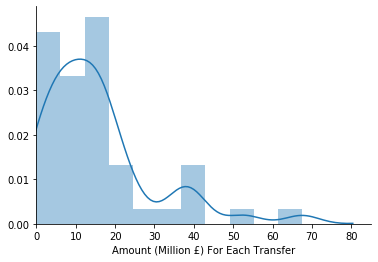

In [36]:
'''
distribution of the transfer amounts
'''
sns.distplot(full_worst_transfers_df.loc[full_worst_transfers_df['Transfer Amount'].notna(),'Transfer Amount'])
plt.xlabel('Amount (Million £) For Each Transfer')
plt.xlim(left=0)
sns.despine()

In [37]:
'''
creating a DataFrame to examine the countries that the players transferred from
'''

country_pivot = full_worst_transfers_df.pivot_table(index = 'Country of Previous Club',
                                                    values = 'Name of Previous Club',aggfunc = np.size)
country_pivot.reset_index(inplace = True)
country_pivot.sort_values(by=['Name of Previous Club'],ascending = False,inplace = True)
country_pivot

,Country of Previous Club,Name of Previous Club
1,England,15
6,Italy,13
11,Spain,6
2,France,3
9,Portugal,3
4,Greece,2
0,Croatia,1
3,Germany,1
5,Holland,1
7,Mexico,1


Text(0, 0.5, 'Number of Players')

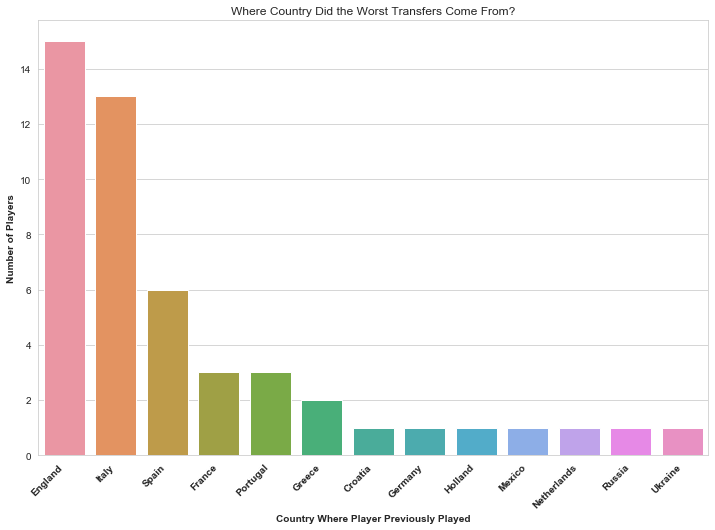

In [38]:
'''
creating a bar plot to examine the countries where the worst transfers previously played
'''
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Country of Previous Club',y='Name of Previous Club',data=country_pivot)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight = 'bold'
)
plt.title('Where Country Did the Worst Transfers Come From?')
plt.xlabel("Country Where Player Previously Played", fontweight = 'bold')
plt.ylabel("Number of Players", fontweight = 'bold')

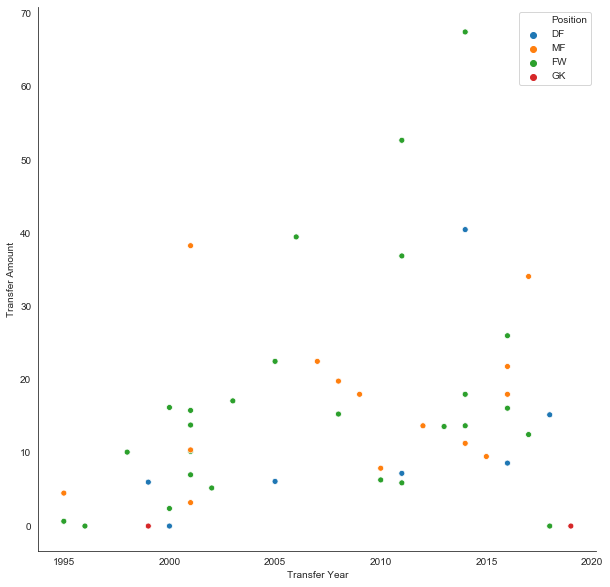

In [40]:
'''
creating a scatter plot to see if there's any correlation between how expensive the worst transfer was and the
position they played
'''
sns.set_style('white')
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f)
sns.scatterplot(x="Transfer Year", y="Transfer Amount", hue = 'Position', data=full_worst_transfers_df)